# PROJECT OVERVIEW

In this project, I will focus on data cleaning, imputation, analysis, and visualization to derive valuable insights for a business stakeholder.

## Business understanding

Our company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, In order to pursue this venture the company has to be in the know of  potential risks of aircraft. This includes the number of accidents that each aircraft has had over the years,the market demand and the safety of the aircraft. I have been charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. I will thereby translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# The data

In the data folder is a dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

# Key points

1. My analysis would yield three concrete business recommendations
2. Communication
3. Visualization

# Import necessary libraries to be used in the project

In [1]:
#IMPORTING ALL NECESSARY LIBRARIES.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

#This part here ignores warnings
from pandas.errors import DtypeWarning

warnings.filterwarnings("ignore", category=DtypeWarning)

# Load the dataset

In [2]:
#This reads the dataset that I want to work on 
df = pd.read_csv("AviationData.csv",encoding = 'Windows-1252')


# Data sanity check

In [3]:
#This gives us the shape of the dataset.It has (88889)rows and (31)collumns
df.shape


(88889, 31)

In [4]:
#This give an outline of the first 5 rows of the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
#This give an outline of the last 5 rows of the dataset
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
#Gives a look into the columns inside the dataframe
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
#This gives us the summary statistics of the dataset
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [8]:
#This give summary satistics of objects
df.describe(include="object")

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001214X45071,Accident,CEN22LA346,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [9]:
#This gives the total overview of our dataset
#From the look of the data, we have a couple of missing data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [10]:
#Now lets find the missing values 
#Well,we have a number of collumns that have missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [11]:
#Lets now check the percentage of missing values in the columns so as it can give us insights on what columns we would drop
df.isna().sum()/len(df)*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

Great, We now know what columns have massive numbers of missing data and dropping them will be neccessary. Not droping them would affect what I really want to achieve.

# Cleaning the dataset


droping the collumns that wont be needed. All the columns that I would be droping I will be storing them in the columns_dropped variable.

In [12]:
#placing unneccessary columns in a variable
columns_dropped = ['Accident.Number','Location', 'Country','Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'FAR.Description',
'Schedule','Air.carrier', 'Publication.Date']

In [13]:
#droping the columns from the original dataframe to refined one
cleaned_df = df.drop(columns=columns_dropped)

In [14]:
#first five rows of the dataset
cleaned_df.head()


,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [15]:
#finding duplicates
cleaned_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [16]:
#Checking out the duplicates and printing them out
duplicates = cleaned_df[df.duplicated()]

print(duplicates)

Empty DataFrame
Columns: [Event.Id, Investigation.Type, Event.Date, Injury.Severity, Aircraft.damage, Aircraft.Category, Make, Model, Amateur.Built, Number.of.Engines, Engine.Type, Purpose.of.flight, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured, Weather.Condition, Broad.phase.of.flight, Report.Status]
Index: []


In [17]:
#Choosing a primary key which helps in removing duplicates
cleaned_df = cleaned_df.drop_duplicates(subset="Event.Id")

In [18]:
#Now lets do a quick check at our dataframe to see if there are duplicates 
duplicate_count = cleaned_df.duplicated().sum()
duplicate_count
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


Great, We dropped the duplicates. 

# Data Analysis

In [19]:
#This line basically ignores the warnings
import warnings
warnings.filterwarnings('ignore')
#This defines a function called aircraft_category and identifies the Nan values and replaces them with Unknown
def aircraft_category(value):
    if pd.isna(value) or value.strip() == "":
        return "Unknown"
    return value.strip().title()

# Apply it to the column
cleaned_df["Aircraft.Category"] = cleaned_df["Aircraft.Category"].apply(aircraft_category)

In [20]:
cleaned_df.head()

,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,1948-10-24,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,Fatal(3),Destroyed,Unknown,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,Fatal(2),Destroyed,Unknown,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,Fatal(1),Destroyed,Unknown,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


Now, lets check for the other existing nan values

In [21]:
#Checks for the number of nan values in each and every column in my cleaned_df
cleaned_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Injury.Severity             990
Aircraft.damage            3103
Aircraft.Category             0
Make                         63
Model                        92
Amateur.Built               100
Number.of.Engines          6027
Engine.Type                7024
Purpose.of.flight          6122
Total.Fatal.Injuries      11267
Total.Serious.Injuries    12322
Total.Minor.Injuries      11760
Total.Uninjured            5863
Weather.Condition          4473
Broad.phase.of.flight     27114
Report.Status              6361
dtype: int64

In [22]:
#This if and ifelse loop checks out our data set and replaces the nan values with median for numerical values and mode for categorical values 
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == 'object':
        #Categorical value filled with the most frequent value(mode)
        cleaned_df[column] = cleaned_df[column].fillna(cleaned_df[column].mode()[0])
    else:
        #Numerical value filled with median
        cleaned_df[column] = cleaned_df[column].fillna(cleaned_df[column].median())

In [23]:
cleaned_df.head()

,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,1948-10-24,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,Fatal(3),Destroyed,Unknown,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,Fatal(2),Destroyed,Unknown,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,Fatal(1),Destroyed,Unknown,Cessna,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause


In [24]:
#Rechecking if there are any nan values 
cleaned_df.isna().sum()

Event.Id                  0
Investigation.Type        0
Event.Date                0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

Great! the dataset is from nan values 

In [25]:
import warnings
warnings.filterwarnings('ignore')
#The is a little bit of differences in values in my dataset. look at the Make column.Cessna tends to be the same as CESSNA.
#To fix this, I am making all the values in this column in capital letters
cleaned_df['Make'] = cleaned_df['Make'].str.upper()

In [26]:
cleaned_df.head()

,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,1948-10-24,Fatal(2),Destroyed,Unknown,STINSON,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,Fatal(4),Destroyed,Unknown,PIPER,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,Fatal(3),Destroyed,Unknown,CESSNA,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,Fatal(2),Destroyed,Unknown,ROCKWELL,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,Fatal(1),Destroyed,Unknown,CESSNA,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause


In [27]:
cleaned_df.shape

(87951, 19)

Great, the dataset is now clean.

# Visualizations


Great, now that we have a much clearer dataset, let us now visualise it to make a more informed decision. First, let us plot a bargraph to see the number of accidents of all the aircrafts in our dataset over the years to see which aircraft has the most number of accidents. 

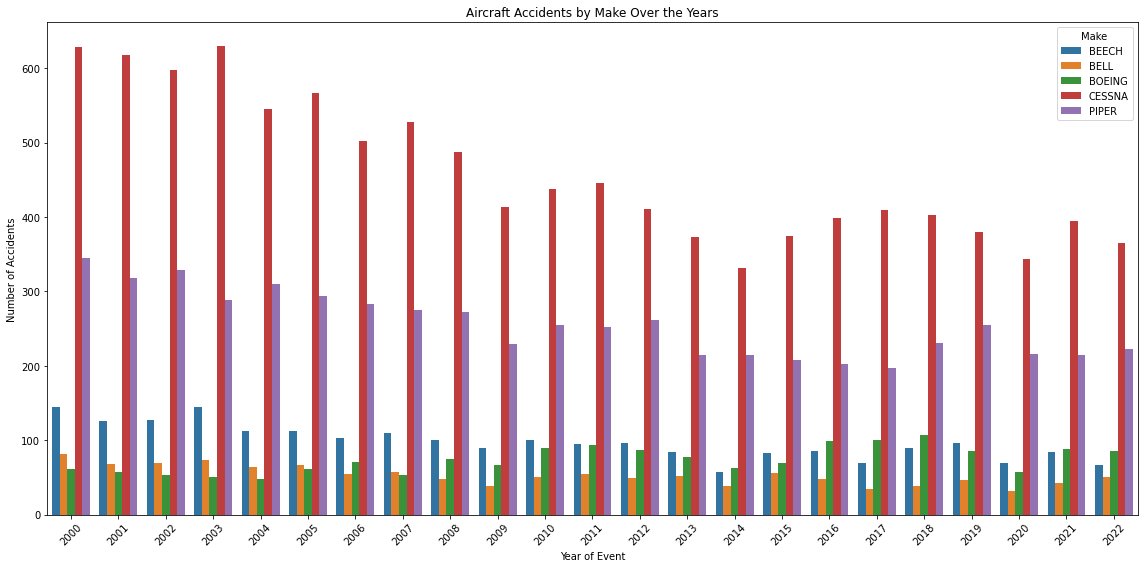

In [28]:
#creates a new dataframe called Event.Date and uses pandas to read it as a date
cleaned_df['Event.Date'] = pd.to_datetime(cleaned_df['Event.Date'], errors='coerce')

# Create Event.Year column
cleaned_df['Event.Year'] = cleaned_df['Event.Date'].dt.year
#But if you want to group by year, you need a new column that only contains the year part, like 2010.This is why we are using dt.year in my previous code.
grouped = cleaned_df.groupby(['Event.Year', 'Make']).size().reset_index(name='Accident Count')

# Optional: Filter recent years and top makes
grouped = grouped[grouped['Event.Year'] >= 2000]
top_makes = cleaned_df['Make'].value_counts().head(5).index
grouped = grouped[grouped['Make'].isin(top_makes)]

# Plot
plt.figure(figsize=(16,8))
ax = sns.barplot(data=grouped, x='Event.Year', y='Accident Count', hue='Make', dodge=True, palette='tab10')

#Customize
ax.set_title('Aircraft Accidents by Make Over the Years')
ax.set_xlabel('Year of Event')
ax.set_ylabel('Number of Accidents')
ax.legend(title='Make', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

oh, Perfect we now know basing on this bargraph that Cessna has been having more accidents over the years. 

Now,lets have a look at each make and the number of events based on the event ID.

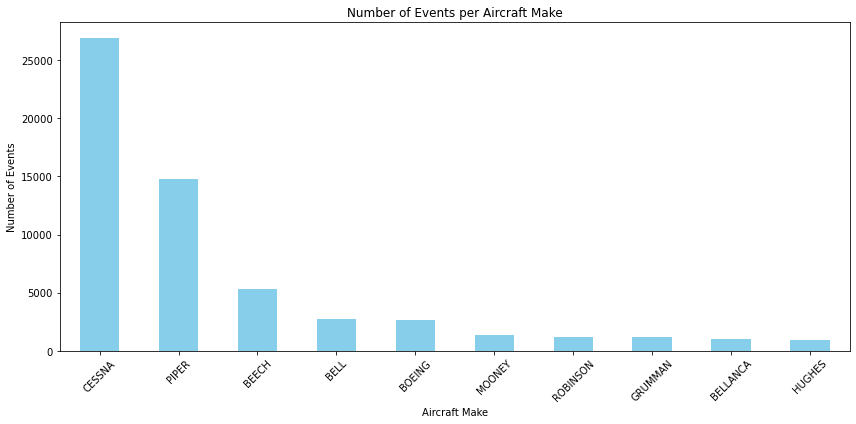

In [32]:
# This Groups by 'Make' and count unique 'Event.Id'
event_counts = cleaned_df.groupby('Make')['Event.Id'].nunique().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
top_makes.plot(kind='bar', color='skyblue')

plt.title('Number of Events per Aircraft Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Again,CESSNA seems to have a huge number of events compaired to the rest of the aircrafts.

Lets take a look at CESSNA

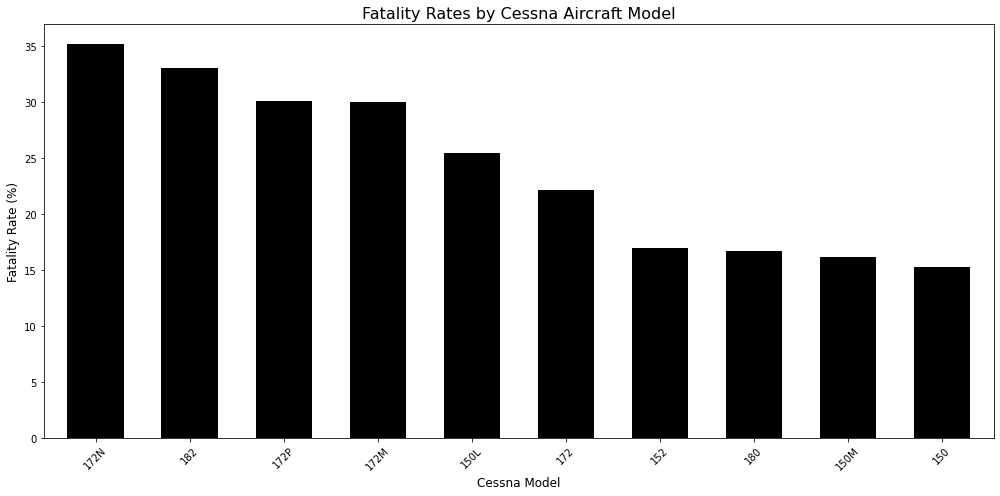

In [40]:
# Filter data for 'Cessna' models
cessna_data = cleaned_df[cleaned_df['Make'] == 'CESSNA']

# Calculate the number of accidents for each Cessna model
accidents_by_model = cessna_data['Model'].value_counts().head(10)

# Calculate the total number of fatal injuries for each Cessna model
fatalities_by_model = cessna_data.groupby('Model')['Total.Fatal.Injuries'].sum()

# Calculate the fatality rate (total fatal injuries / number of accidents)
fatality_rate = (fatalities_by_model / accidents_by_model).dropna().sort_values(ascending=False) * 100  # Convert to percentage

# Plot the fatality rates for Cessna models
plt.figure(figsize=(14, 7))
plt.title('Fatality Rates by Cessna Aircraft Model', fontsize=16)  # Correct title format
fatality_rate.plot(kind='bar', color='black', width=0.6)  # Use a reasonable bar width
plt.xlabel('Cessna Model', fontsize=12)
plt.ylabel('Fatality Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

Now, lets check the number of accidents basing on the phase of flight.

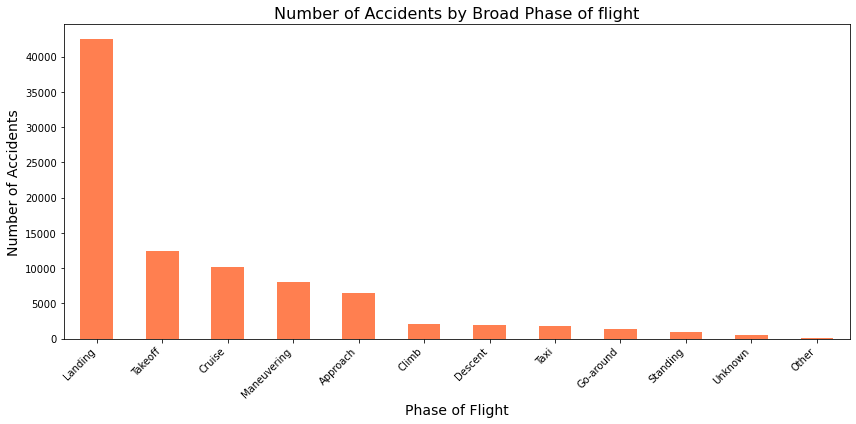

In [30]:

# Groups by Broad Phase of Flight and count number of accidents
phase_counts = cleaned_df['Broad.phase.of.flight'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
phase_counts.plot(kind='bar', ax=ax, color='coral')

#Set titles and labels
ax.set_title('Number of Accidents by Broad Phase of flight', fontsize=16)
ax.set_xlabel('Phase of Flight', fontsize=14)
ax.set_ylabel('Number of Accidents', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Most accidents occur during landing !!!

# Convert my file to csv 

In [ ]:
#I am coverting my file to csv format and the na_rep='NA'is used as a place holder for missing values incase they are t
df_cleaned.to_csv("df_cleaned.csv", na_rep='NA', index=False)